In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
data_csv = pd.read_csv("result_data/Results-March20-Import-Ready.csv")
data_csv.head()

,Dataset,RWPE,Model,BACC (Graph Norm),AUROC (Graph Norm),F1 (Graph Norm),BACC (Batch Norm),AUROC (Batch Norm),F1 (Batch Norm),BACC (Graph Norm OP),AUROC (Graph Norm OP),F1 (Graph Norm OP),Threshold
0,BFS,False,dgcn,0.715,0.809,0.155,0.704,0.783,0.141,0.577,0.807,0.131,0.925
1,BFS,False,gat,0.699,0.792,0.153,0.681,0.717,0.101,0.598,0.843,0.241,0.961
2,BFS,False,gcn,0.648,0.706,0.141,0.619,0.637,0.059,0.581,0.784,0.197,0.967
3,BFS,False,gps,0.651,0.681,0.166,0.647,0.669,0.034,0.656,0.807,0.111,0.797
4,BFS,False,gs,0.752,0.837,0.171,0.748,0.815,0.147,0.644,0.877,0.282,0.971


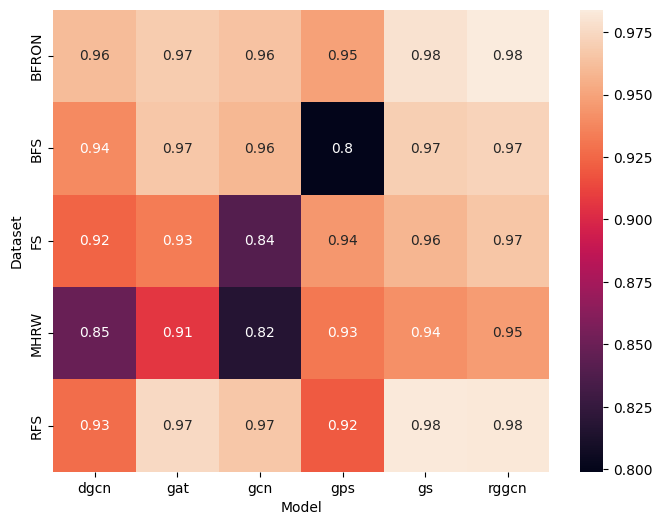

In [27]:
plt.figure(figsize=(8, 6))
temp = data_csv[data_csv["Model"] != "lgbm"].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
temp_pivot = pd.pivot(temp, "Dataset", "Model", "Threshold")
sns.heatmap(temp_pivot, annot=True)
plt.show()

In [13]:
def plot_diagram_d(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 6))

    # Data with no randomwalk
    sns.barplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[0])
    axes[0].set_title(f'Dataset vs {metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Dataset')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.barplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[1])
    axes[1].set_title(f'Dataset vs {metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Dataset')
    axes[1].set_ylabel('Metric Value')

    plt.show()

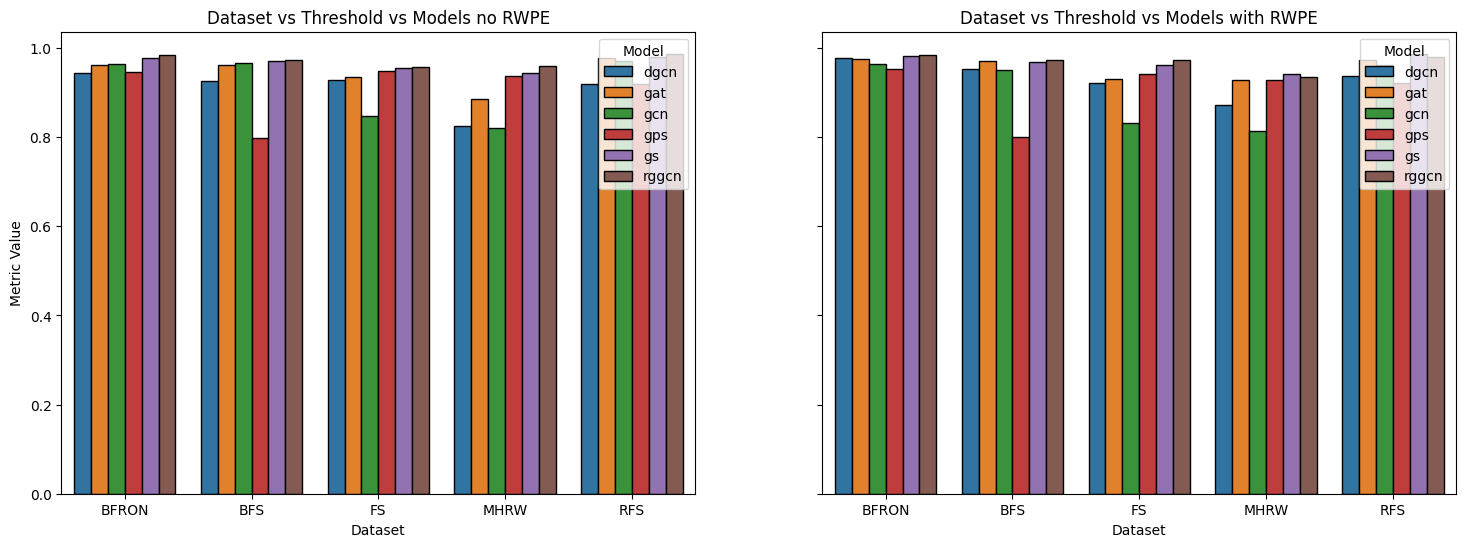

In [14]:
plot_diagram_d(data=data_csv.copy(), metric_value="Threshold")

In [15]:
def plot_diagram_e(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

    # Data with no randomwalk
    sns.pointplot(data=data_no_rwpe, x="Model", y=metric_value, ax=axes[0])
    axes[0].set_title(f'{metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.pointplot(data=data_rwpe, x="Model", y=metric_value, ax=axes[1])
    axes[1].set_title(f'{metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Metric Value')

    plt.show()

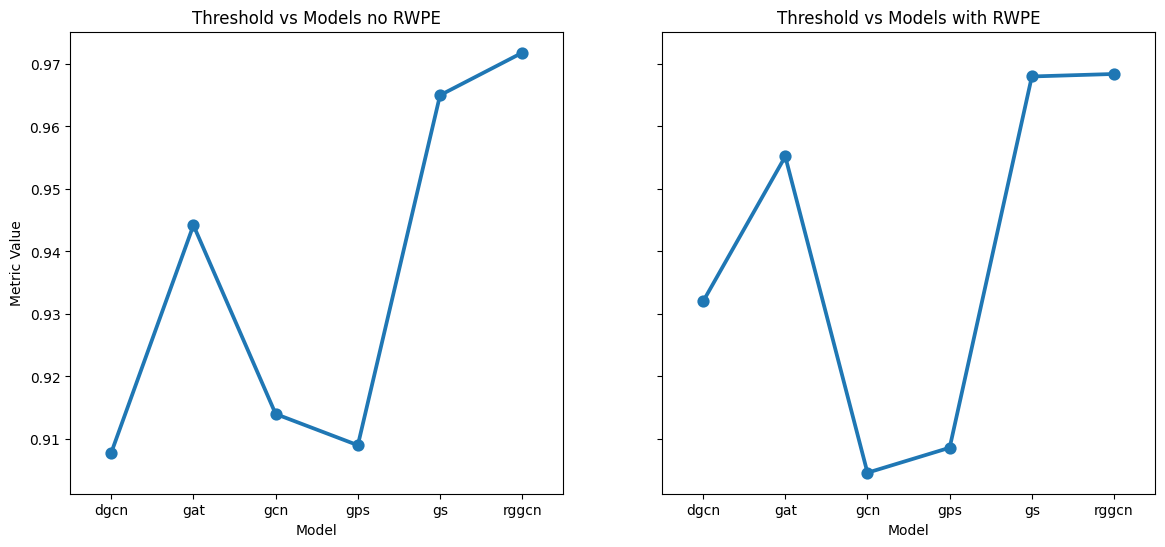

In [16]:
plot_diagram_e(data=data_csv.copy(), metric_value="Threshold")

In [3]:
def plot_diagram_c(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

    # Data with no randomwalk
    sns.pointplot(data=data_no_rwpe, x="Model", y=metric_value, ax=axes[0])
    axes[0].set_title(f'{metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.pointplot(data=data_rwpe, x="Model", y=metric_value, ax=axes[1])
    axes[1].set_title(f'{metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Metric Value')

    plt.show()

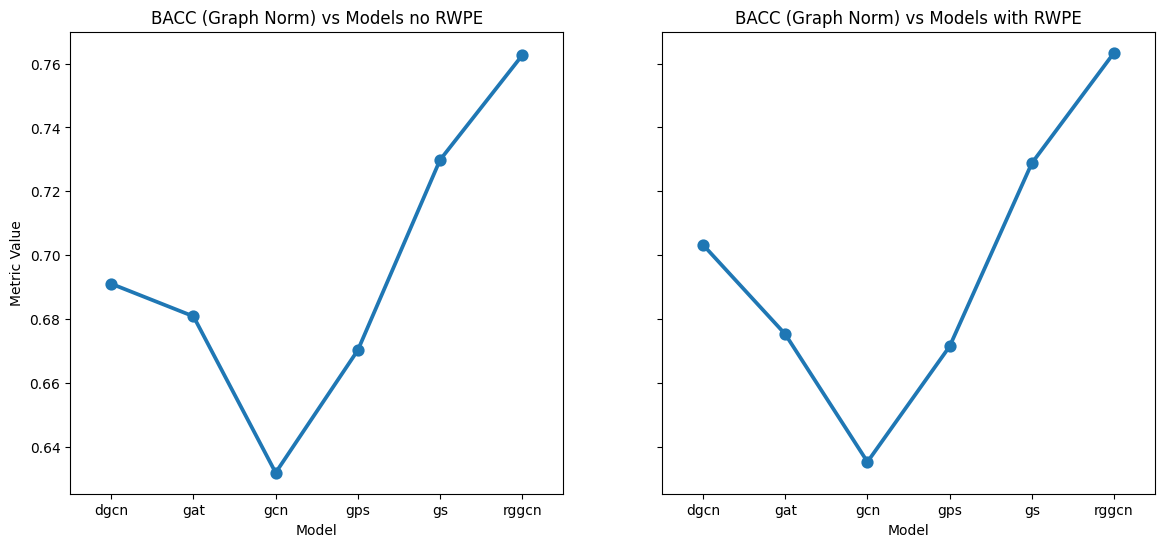

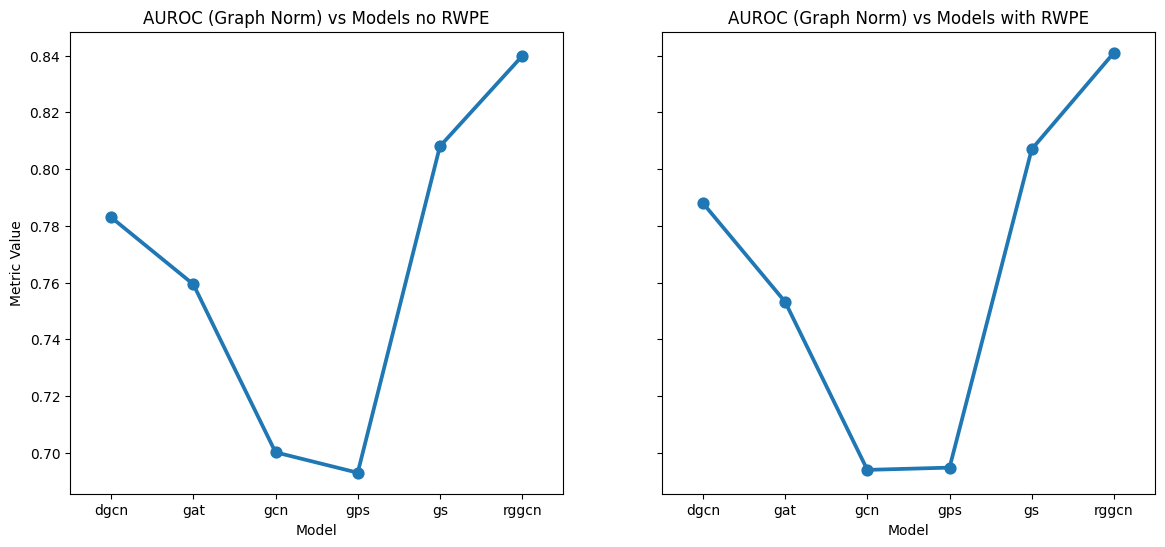

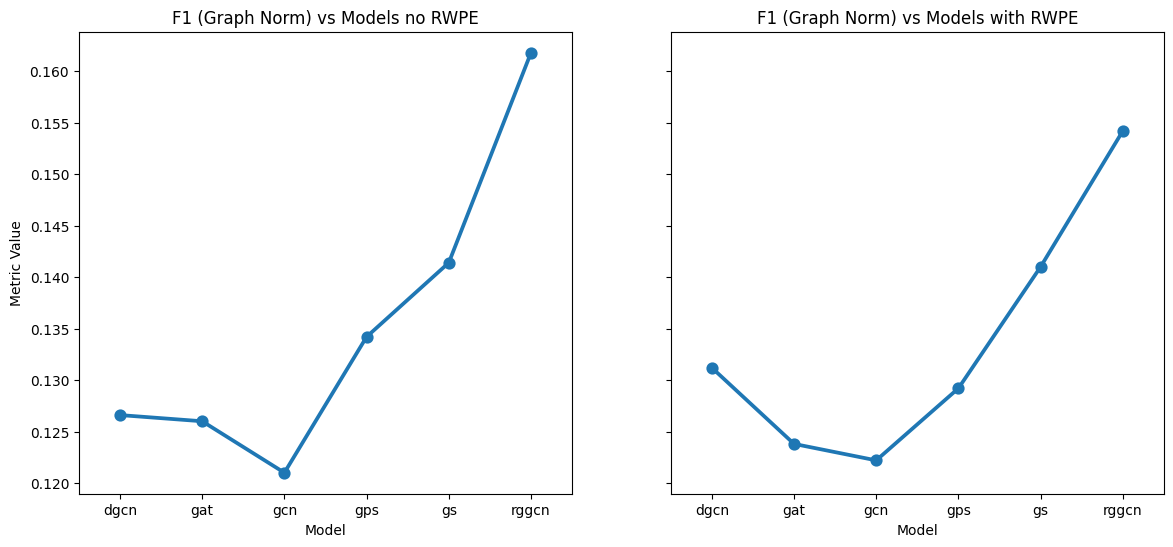

In [4]:
plot_diagram_c(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_c(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_c(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

In [5]:
def plot_diagram_b(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 6))

    # Data with no randomwalk
    sns.barplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[0])
    axes[0].set_title(f'Dataset vs {metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Dataset')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.barplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[1])
    axes[1].set_title(f'Dataset vs {metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Dataset')
    axes[1].set_ylabel('Metric Value')

    plt.show()

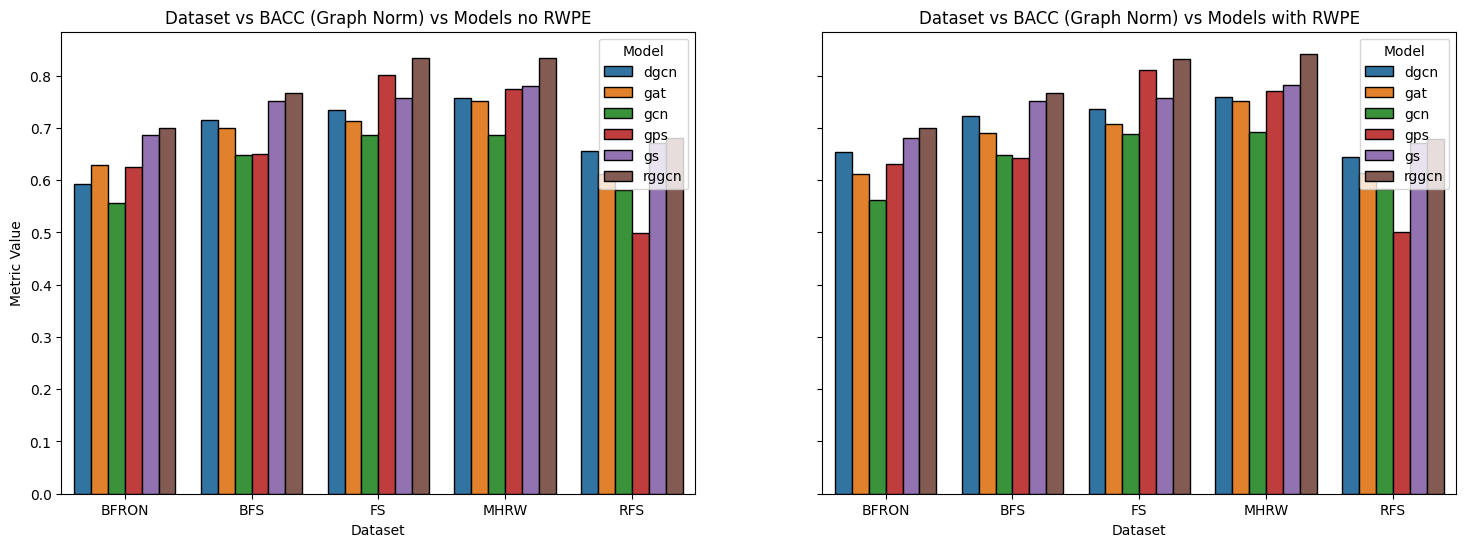

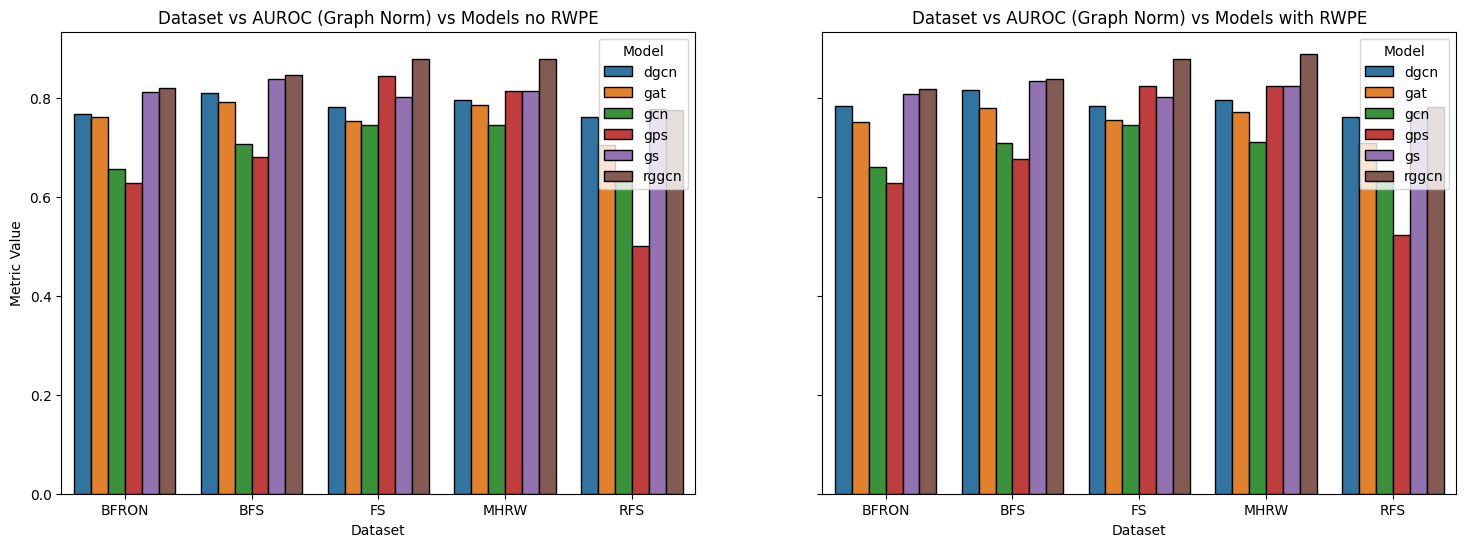

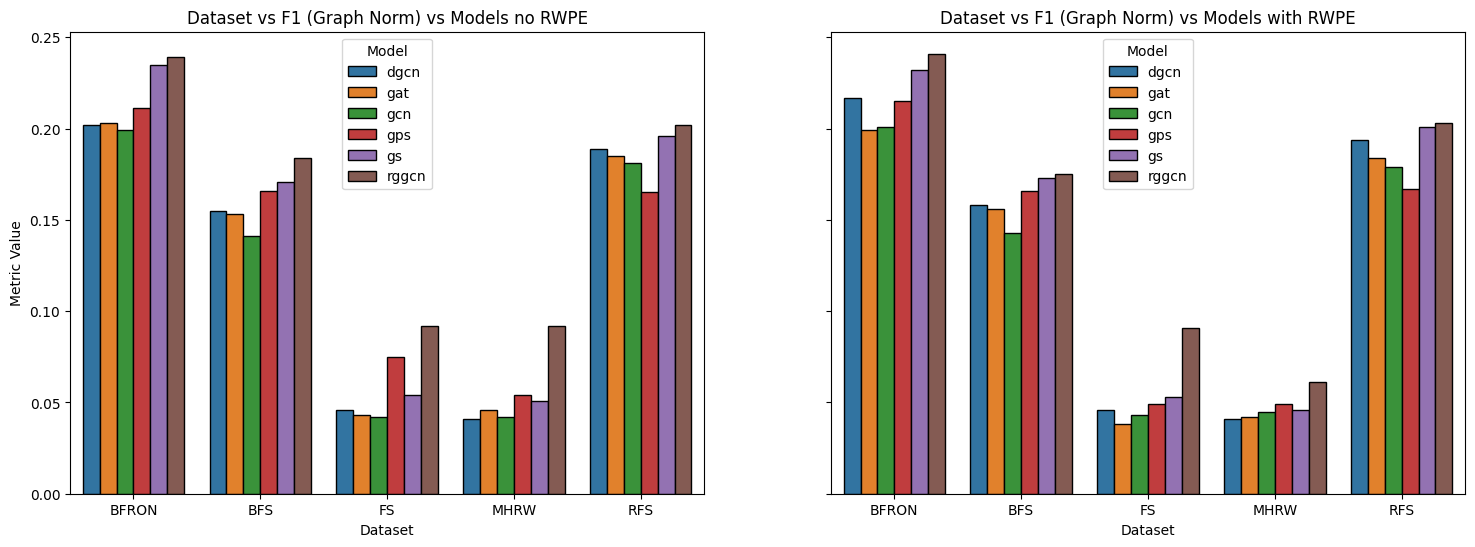

In [6]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

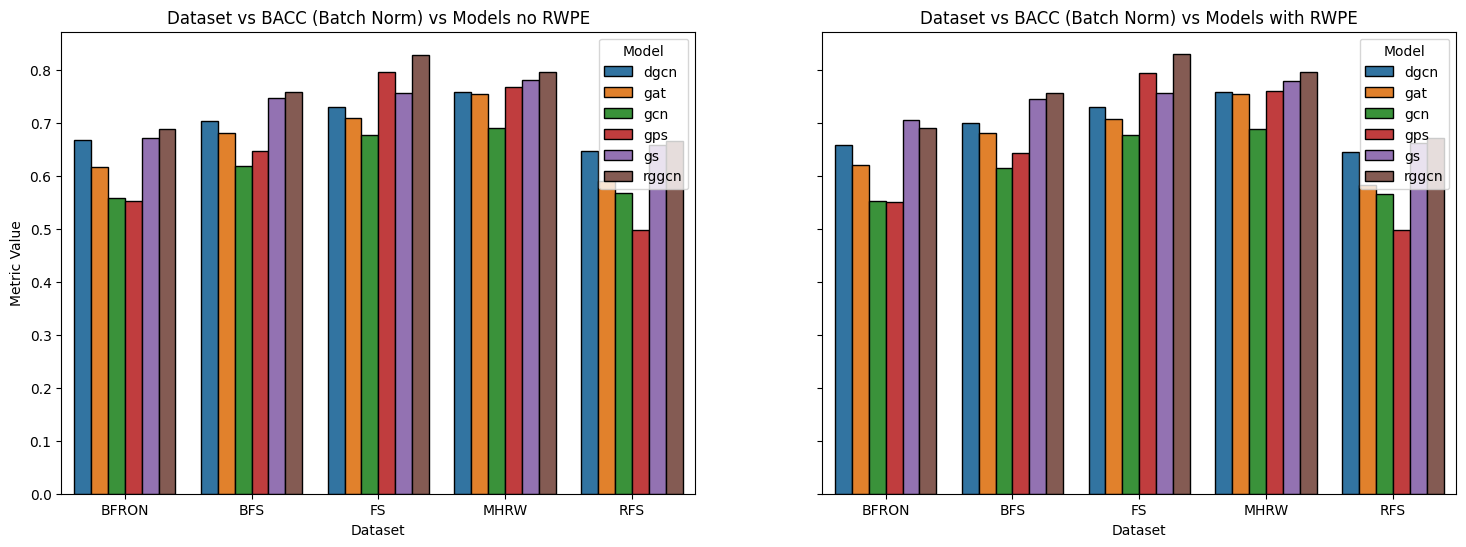

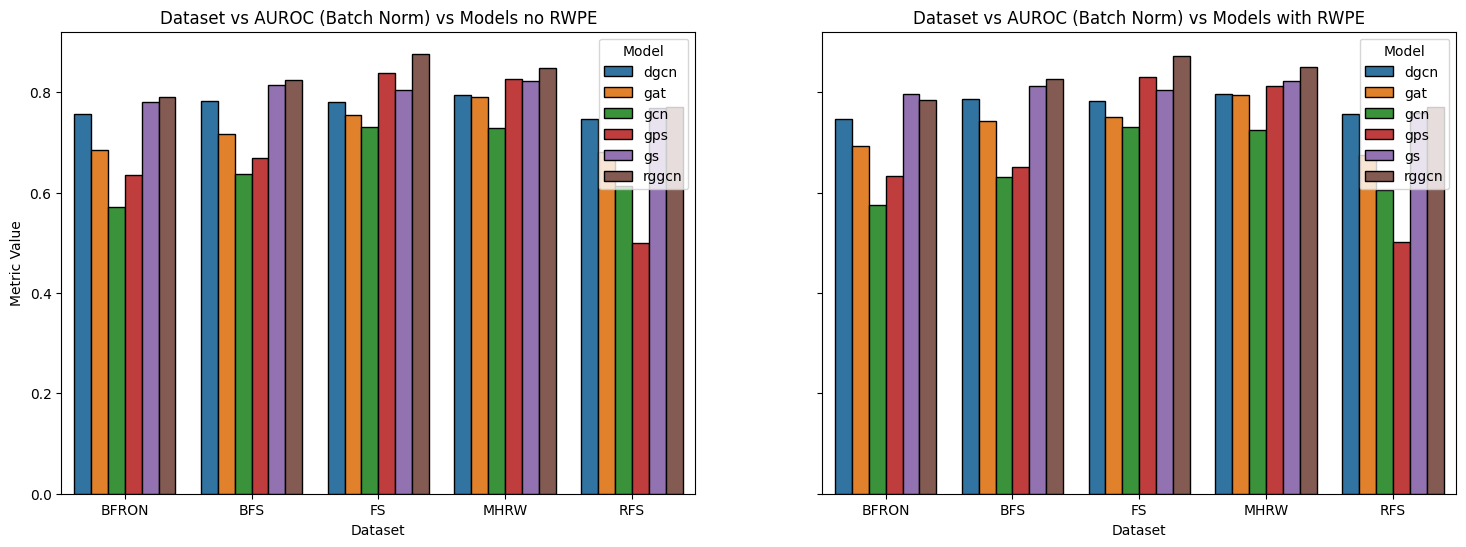

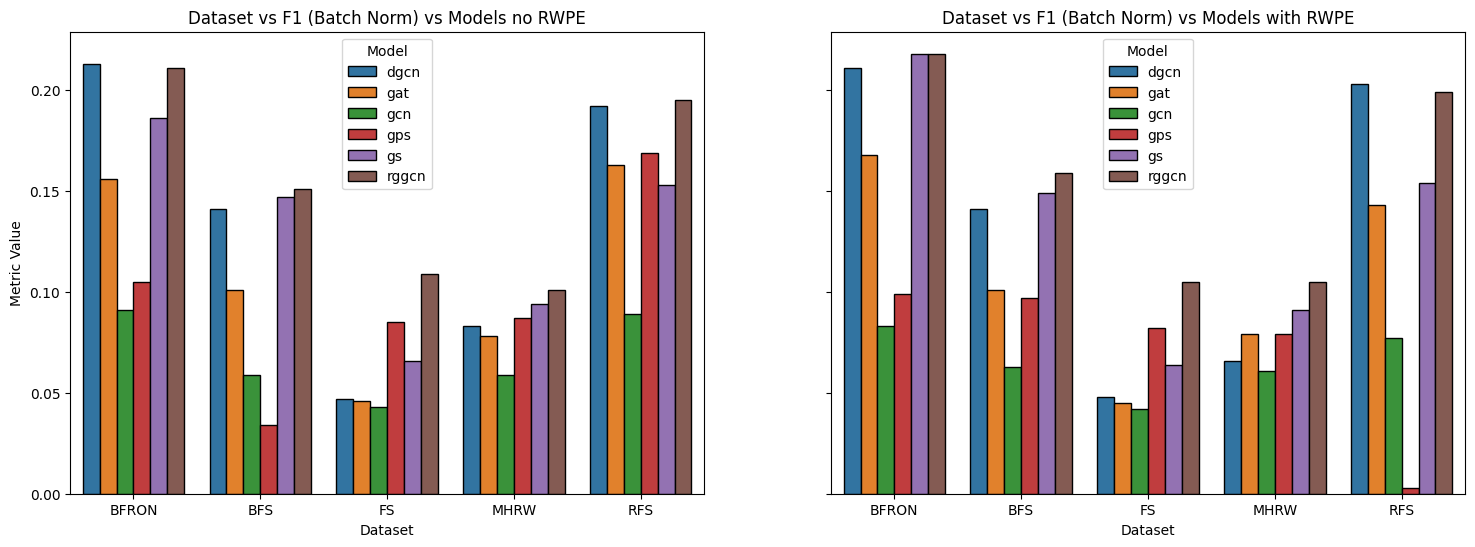

In [7]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Batch Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Batch Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Batch Norm)")

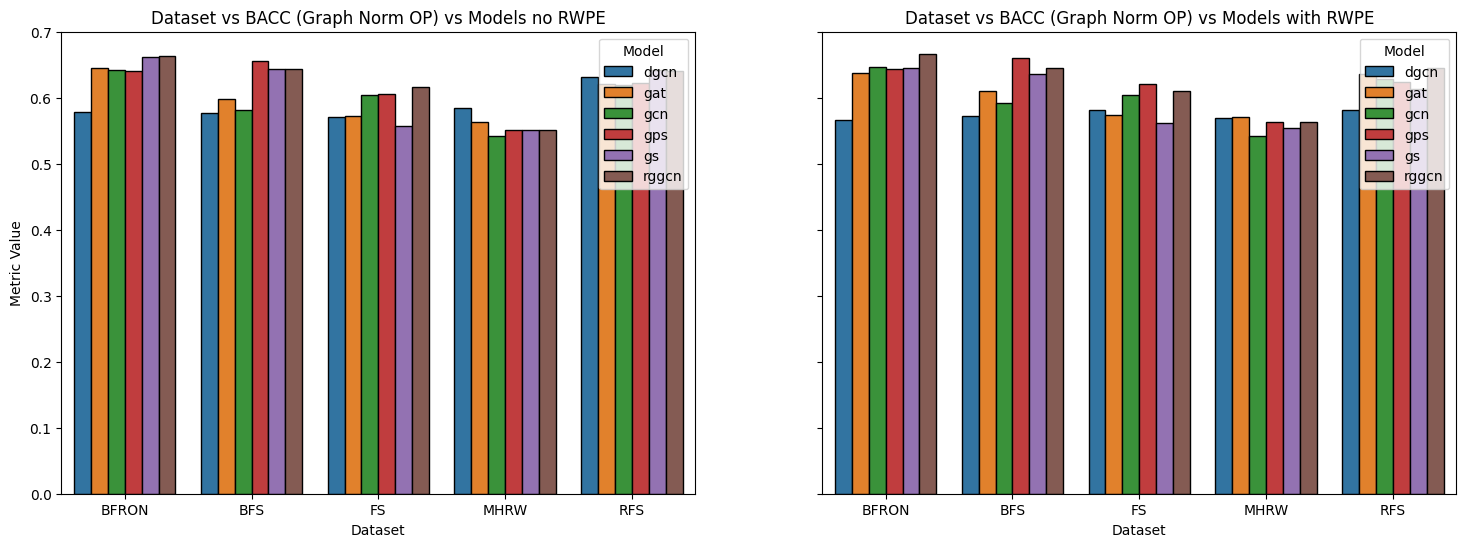

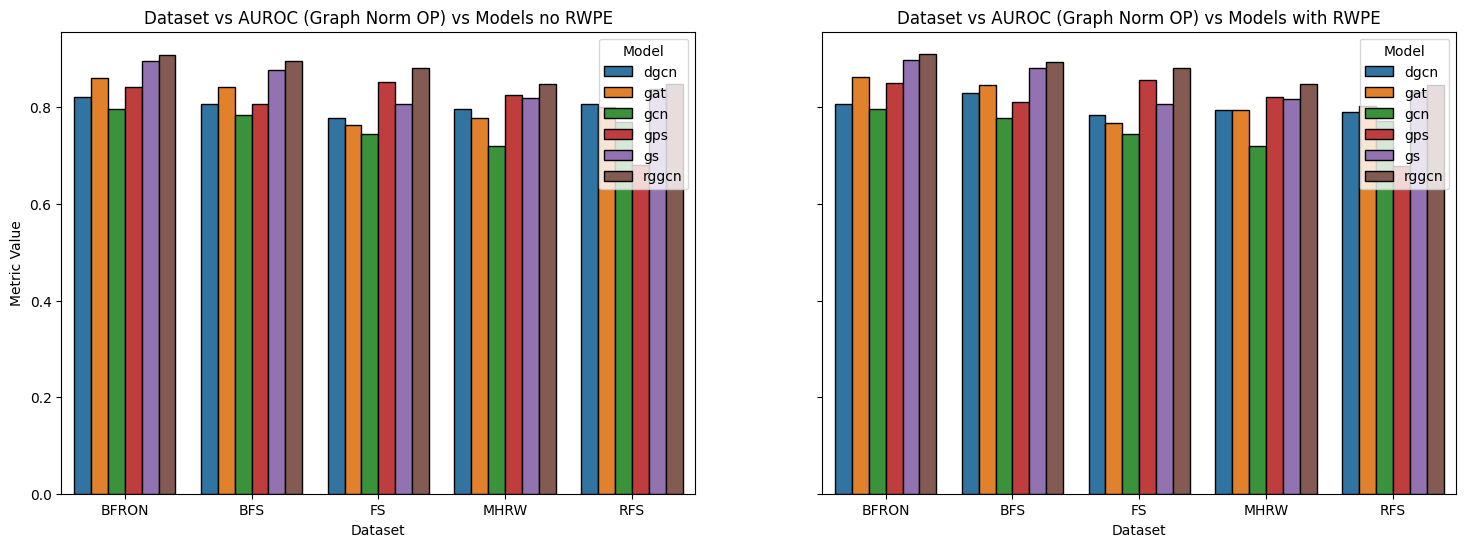

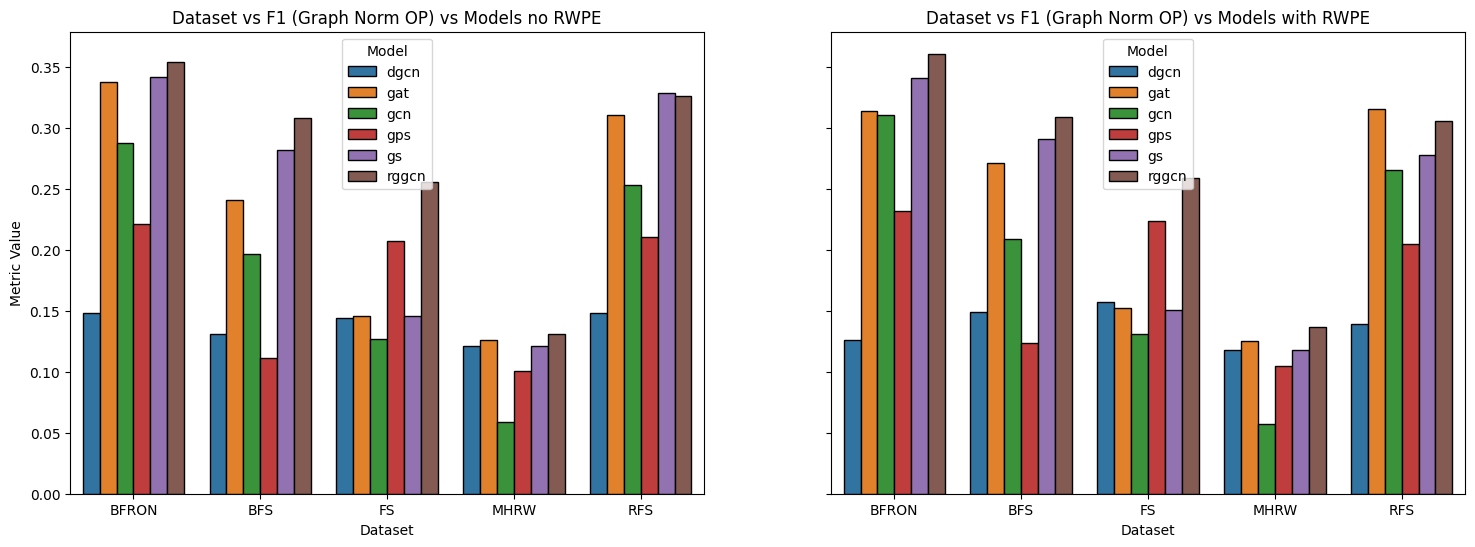

In [8]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Graph Norm OP)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Graph Norm OP)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Graph Norm OP)")

In [9]:
def plot_diagram_a(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_new = data[data["Model"] != "lgbm"].reset_index(drop=True)
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True)
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True)

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

    # All the data
    sns.lineplot(data=data_new, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[0])
    axes[0].set_title(f'Dataset vs {metric_value} vs Models')
    axes[0].set_xlabel('Dataset')
    axes[0].set_ylabel('Metric Value')

    # Data no random walk positional embedding
    sns.lineplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[1])
    axes[1].set_title(f'Dataset vs {metric_value} vs Models no RWPE')
    axes[1].set_xlabel('Dataset')
    axes[1].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.lineplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[2])
    axes[2].set_title(f'Dataset vs {metric_value} vs Models with RWPE')
    axes[2].set_xlabel('Dataset')
    axes[2].set_ylabel('Metric Value')

    plt.show()

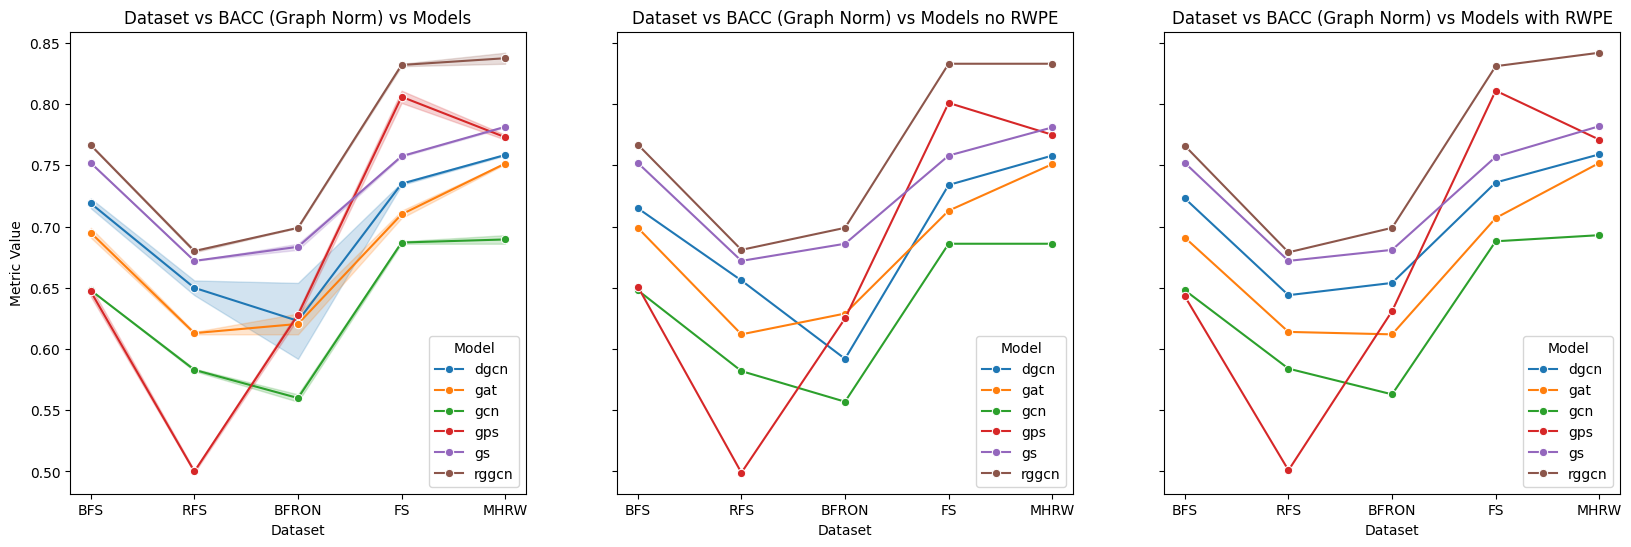

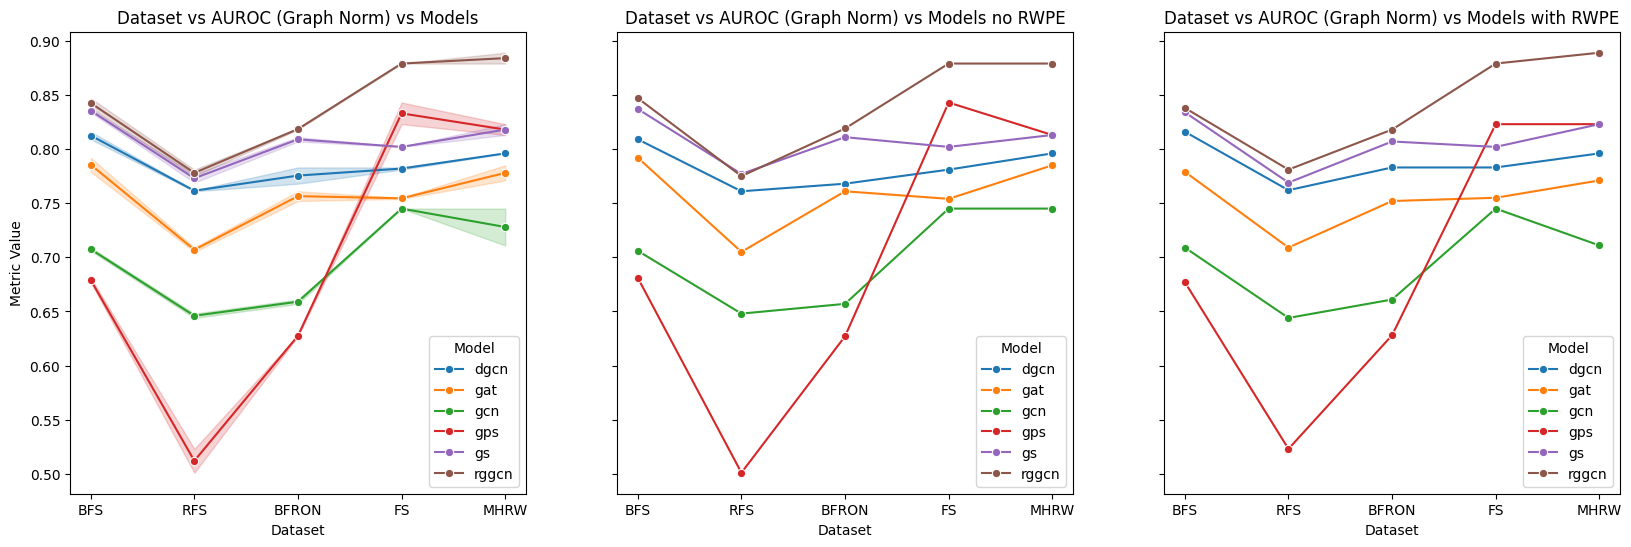

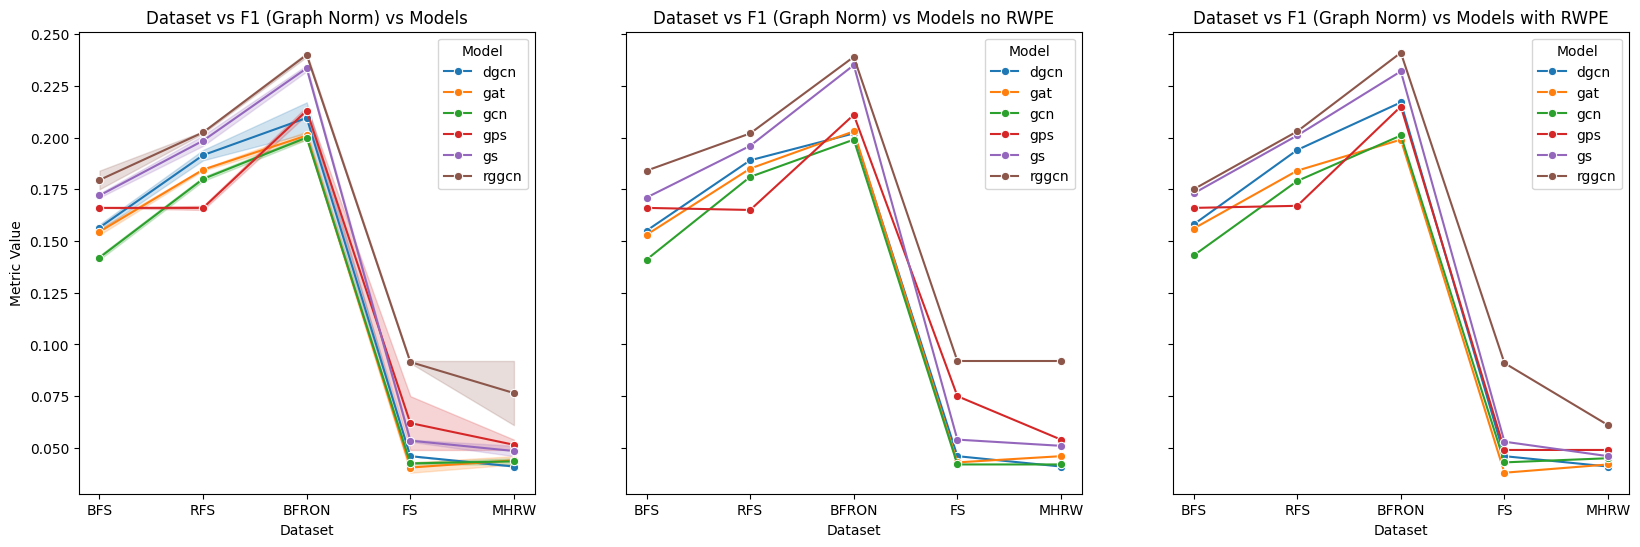

In [10]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

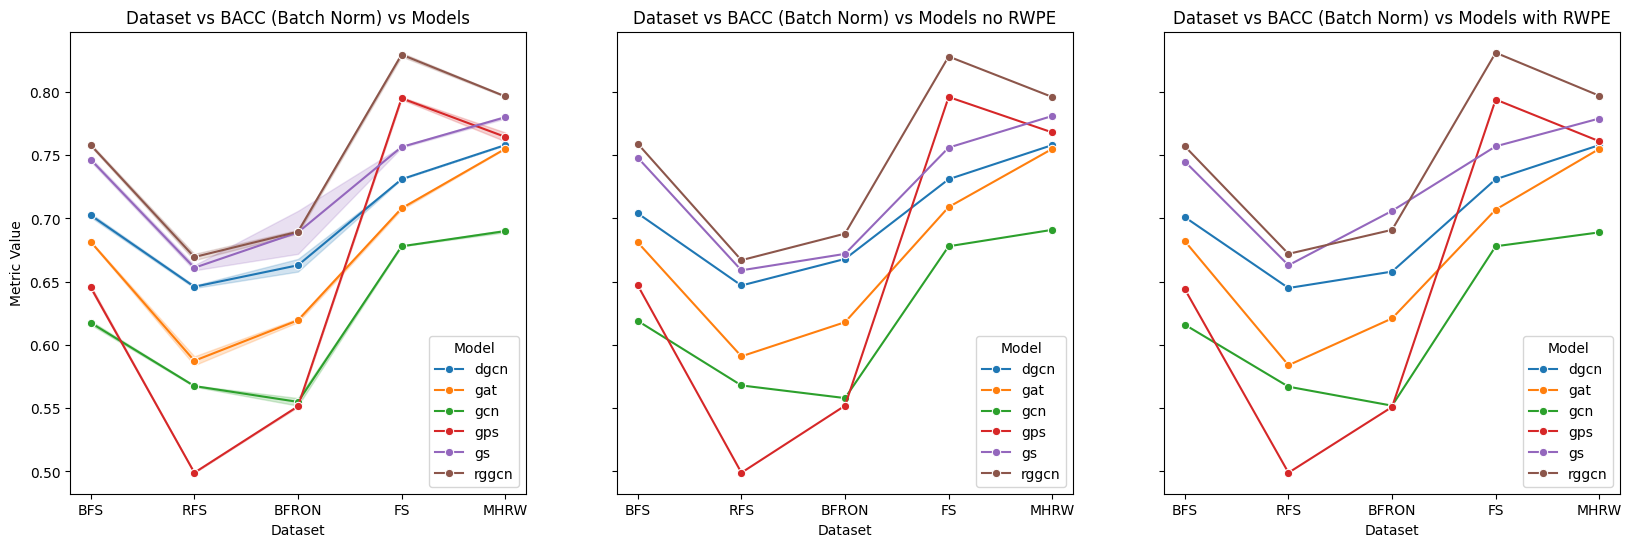

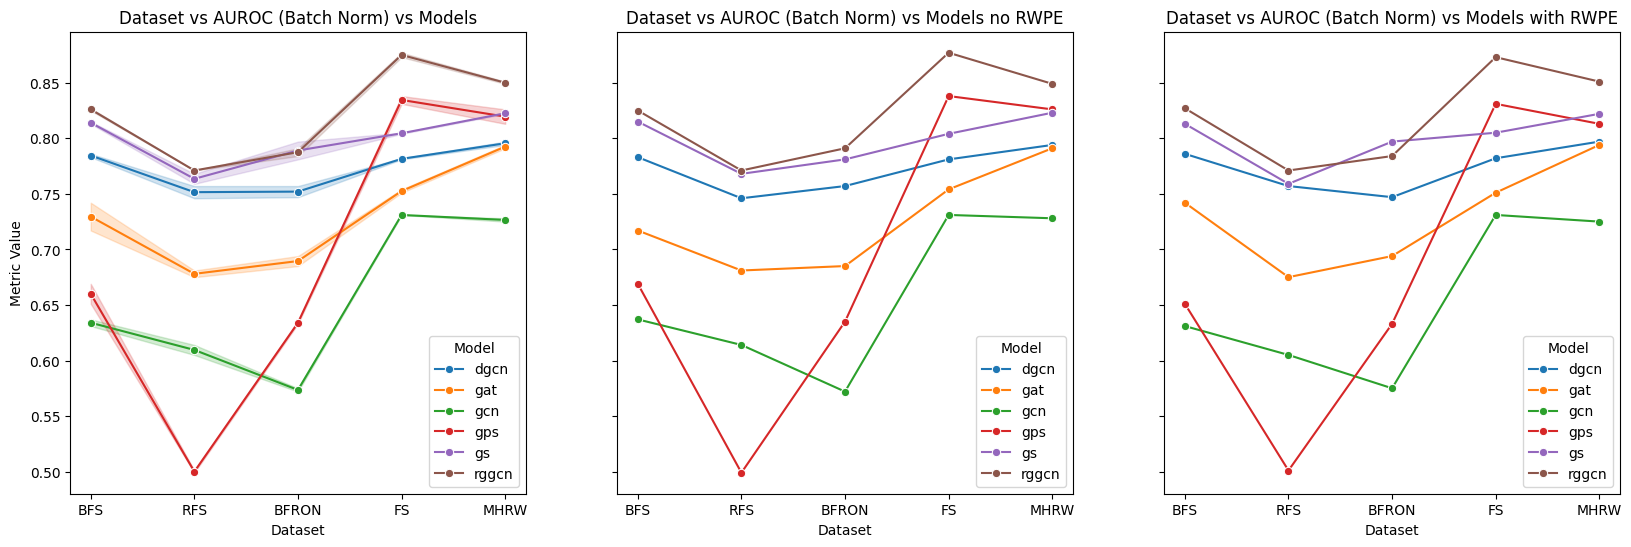

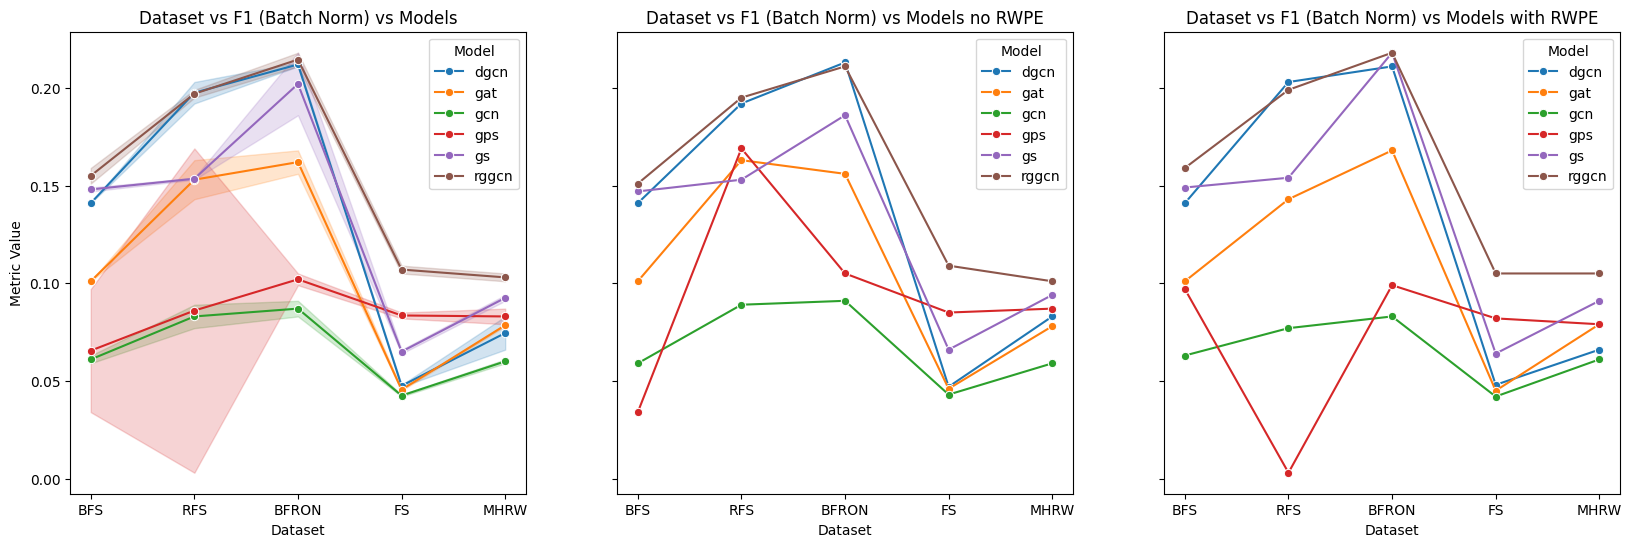

In [11]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Batch Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Batch Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Batch Norm)")

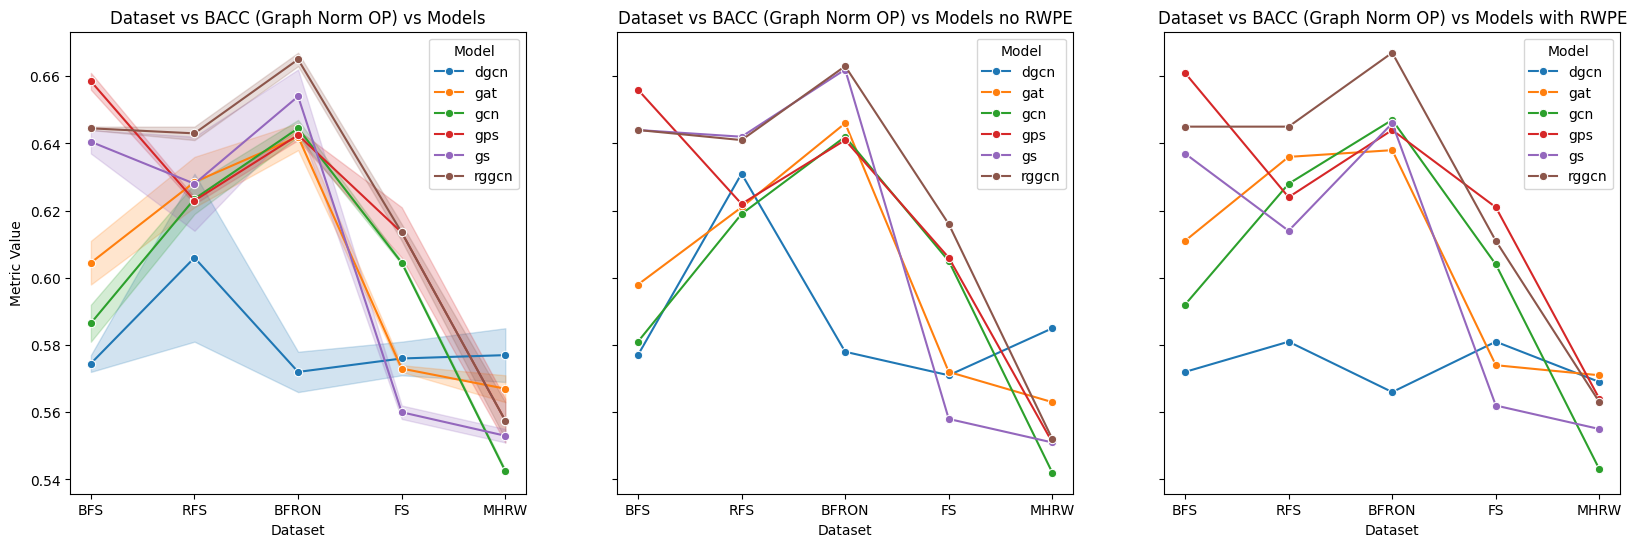

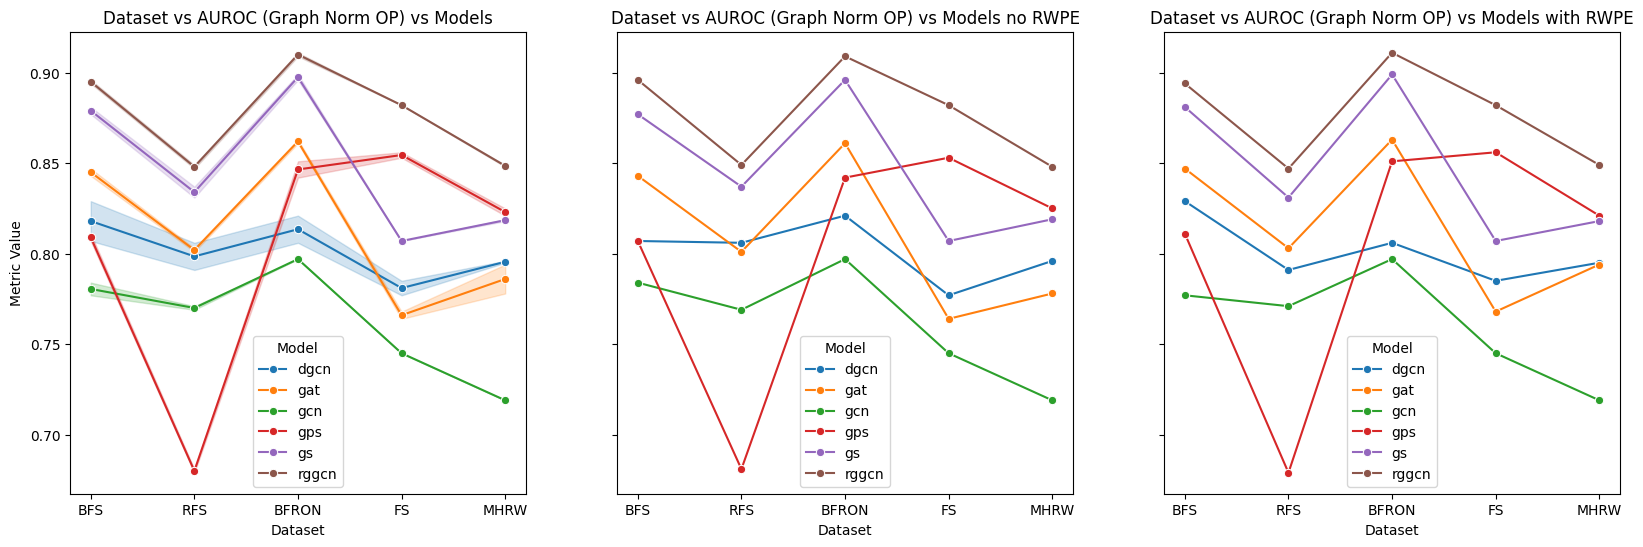

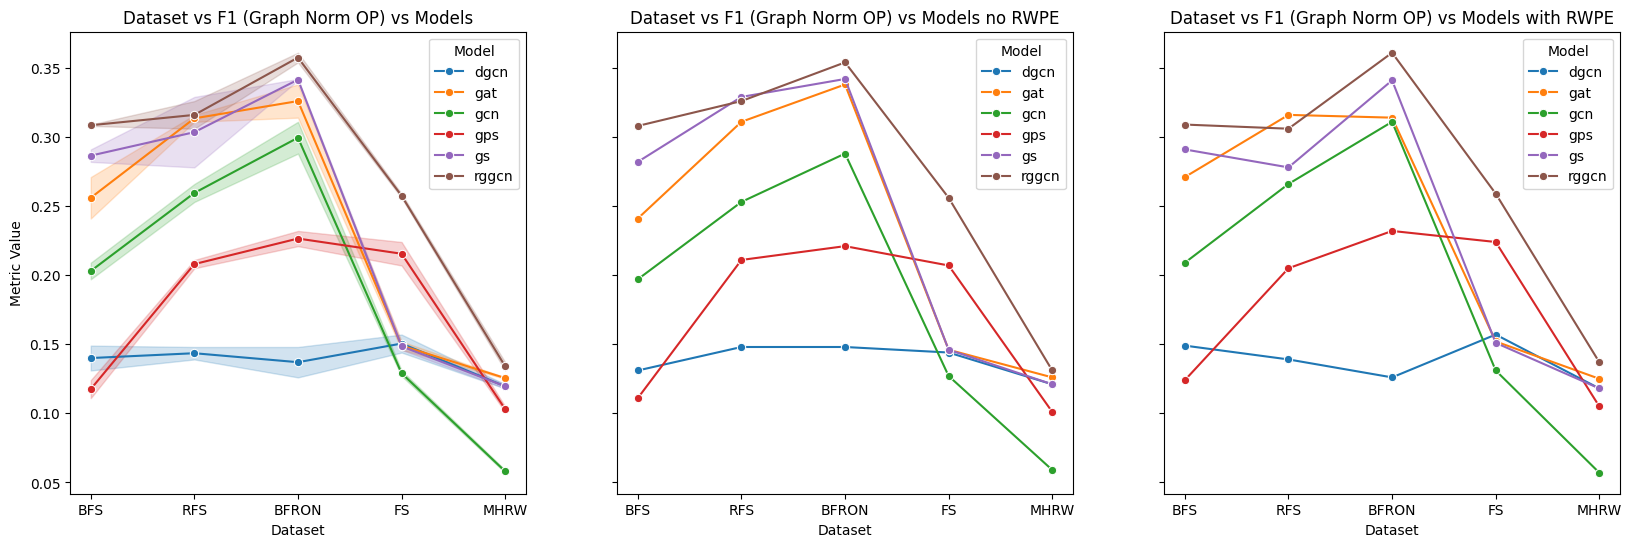

In [12]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Graph Norm OP)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Graph Norm OP)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Graph Norm OP)")